In [82]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import json
import requests
import time
from us import states

In [83]:
#testing 

In [84]:

#load data
csv_path = "Resources/NutritionPhysicalActivityObesity.csv"
nutrition_data = pd.read_csv(csv_path)

# drop unesscary columns and fix labels
nutrition_data = nutrition_data.drop(columns=['Data_Value_Unit',
                                              'Stratification1',
                                              'YearStart'
                                             ])
renamecols_df = nutrition_data.rename(columns={"LocationAbbr":"StateAbbr",
                                                "LocationDesc":"State",
                                                "Age(years)":"Age",
                                                "YearEnd" : "Year"})

#renamecols is df before narrowing age demographic
renamecols_df.head()

,Year,StateAbbr,State,Class,Topic,Question,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,...,Education,Gender,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategory1
0,2012,WY,Wyoming,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,48.5,48.5,32.3,64.9,...,NaN,NaN,NaN,American Indian/Alaska Native,"(43.235541343, -108.109830353)",OWS,OWS1,Q037,56,Race/Ethnicity
1,2012,DC,District of Columbia,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.6,31.6,24.0,40.4,...,Less than high school,NaN,NaN,NaN,"(38.890371385, -77.031961127)",OWS,OWS1,Q036,11,Education
2,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,35.2,35.2,30.7,40.0,...,NaN,NaN,NaN,NaN,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,1,Age (years)
3,2013,US,National,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,27.9,27.9,27.6,28.3,...,NaN,Female,NaN,NaN,NaN,PA,PA1,Q047,59,Gender
4,2011,US,National,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,16.9,16.9,16.0,17.8,...,NaN,NaN,NaN,NaN,NaN,PA,PA1,Q047,59,Age (years)


In [85]:
#trim age column to include only desired age demographic
agedem_df = renamecols_df.loc[(renamecols_df["Age"] == "18 - 24")
                               |(renamecols_df["Age"] == "25 - 34")
                               |(renamecols_df["Age"] == "35 - 44")
                               |(renamecols_df["Age"] == "45 - 54"),:]
#age is df with focus age deomographic
#while working on indivudal projects we should create and save a df with the needed data
agedem_df.tail()

#define dataframe for veggie and fruit analysis
#define dataframe for excercise/behavior analysis
#define dataframe for obesity rates for gen x and gen y

,Year,StateAbbr,State,Class,Topic,Question,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,...,Education,Gender,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategory1
62999,2013,VA,Virginia,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,34.2,34.2,28.5,40.4,...,NaN,NaN,NaN,NaN,"(37.542680674, -78.457890463)",PA,PA1,Q045,51,Age (years)
63002,2011,AZ,Arizona,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,27.7,27.7,20.7,36.1,...,NaN,NaN,NaN,NaN,"(34.86597028, -111.763811277)",OWS,OWS1,Q037,4,Age (years)
63008,2014,TN,Tennessee,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,39.3,39.3,35.0,43.7,...,NaN,NaN,NaN,NaN,"(35.68094058, -85.774490914)",OWS,OWS1,Q036,47,Age (years)
63022,2013,UT,Utah,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,22.6,22.6,20.5,24.8,...,NaN,NaN,NaN,NaN,"(39.360700171, -111.587130635)",PA,PA1,Q044,49,Age (years)
63027,2013,AZ,Arizona,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,21.4,21.4,15.2,29.2,...,NaN,NaN,NaN,NaN,"(34.86597028, -111.763811277)",PA,PA1,Q047,4,Age (years)


In [86]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Create a dataframe grouping by the 'Sex' column 
age_groups = agedem_df.groupby('Age') 

# Create a dataframe counting the number of data points for each age 
age_groups_count = pd.DataFrame(age_groups['Age'].count()) 

# View the groupby dataframe 
age_groups_count

,Age
Age,
18 - 24,2251
25 - 34,2251
35 - 44,2251
45 - 54,2251


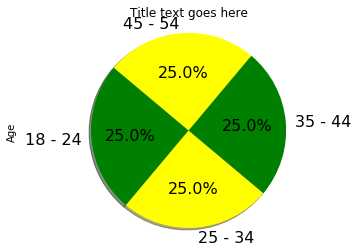

In [87]:
# Create a pie chart based off of the group series from before 
age_groups_count.plot(kind='pie', y='Age', \
                        title="Title text goes here",startangle=140,\
                        autopct='%1.1f%%',shadow=True, fontsize=16, colors =["green","yellow"],legend =False) 

# Make the axis equal to avoid plotting an egg shaped pie chart 
plt.axis("equal") 
#plt.savefig("figures/PandaPieChart.png") 
plt.show()

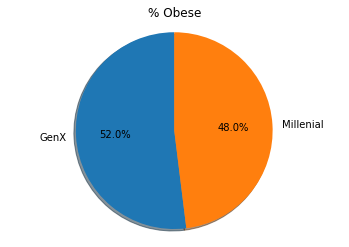

In [88]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise
labels = ['GenX', 'Millenial']
sizes = [GenX_Weight_mean, GenM_Weight_mean]


# Explode out the 'Chemical' pie piece by offsetting it a greater amount
#explode = (0.1, 0.4)

fig, ax = plt.subplots()
ax.pie(sizes,
       #explode=explode,
       labels=labels,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('% Obese')


plt.show()

In [89]:
GenX_Data = agedem_df[(agedem_df["Age"] == "35 - 44") | 
                        (agedem_df["Age"] == "45 - 54")]
GenX_Data.head()

,Year,StateAbbr,State,Class,Topic,Question,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,...,Education,Gender,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategory1
30,2015,NY,New York,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,29.7,29.7,26.7,32.8,...,NaN,NaN,NaN,NaN,"(42.827001032, -75.543970427)",OWS,OWS1,Q036,36,Age (years)
32,2013,MT,Montana,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,35.5,35.5,31.7,39.5,...,NaN,NaN,NaN,NaN,"(47.066528972, -109.424420645)",PA,PA1,Q045,30,Age (years)
50,2013,SD,South Dakota,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,38.2,38.2,32.6,44.1,...,NaN,NaN,NaN,NaN,"(44.353130053, -100.373530637)",OWS,OWS1,Q037,46,Age (years)
64,2014,GU,Guam,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,27.0,27.0,21.7,32.9,...,NaN,NaN,NaN,NaN,"(13.444304, 144.793731)",PA,PA1,Q047,66,Age (years)
65,2014,GU,Guam,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,31.3,31.3,25.9,37.3,...,NaN,NaN,NaN,NaN,"(13.444304, 144.793731)",PA,PA1,Q047,66,Age (years)


In [113]:
GenM_Data = agedem_df[(agedem_df["Age"] == "18 - 24") | 
                        (agedem_df["Age"] == "25 - 34")]


Year
2011    19.484615
2012    15.931731
2013    19.770192
2014    16.933333
2015    19.742593
Name: Data_Value, dtype: float64

In [130]:
#Making Acitivity and Nutrition Dataframes for Line Graphs
#No Activity
ActivityGenM_df = GenM_Data[(GenM_Data["Question"] == "Percent of adults who engage in no leisure-time physical activity")]
ActivityGenX_df = GenX_Data[(GenX_Data["Question"] == "Percent of adults who engage in no leisure-time physical activity")]
#Fruits and Veggies
NutritionGenM_df = GenM_Data[(GenM_Data["Question"] == "Percent of adults who report consuming vegetables less than one time daily") | (GenM_Data["Question"] == "Percent of adults who report consuming fruit less than one time daily")]
NutritionGenX_df = GenX_Data[(GenX_Data["Question"] == "Percent of adults who report consuming fruit less than one time daily") | (GenM_Data["Question"] == "Percent of adults who report consuming vegetables less than one time daily")]
#Obesity
ObesityGenM_df = GenM_Data[(GenM_Data["Question"] == "Percent of adults aged 18 years and older who have obesity")]
ObesityGenX_df = GenX_Data[(GenX_Data["Question"] == "Percent of adults aged 18 years and older who have obesity")]

#Achieve Means by Years to plot using groupby
ActivityYearsGenM_df =  ActivityGenM_df.groupby("Year")["Data_Value"].mean()
ActivityYearsGenX_df =  ActivityGenX_df.groupby("Year")["Data_Value"].mean()
NutritionYearsGenM_df = NutritionGenM_df.groupby("Year")["Data_Value"].mean()
NutritionYearsGenX_df = NutritionGenX_df.groupby("Year")["Data_Value"].mean()
ObesityYearsGenM_df =  ObesityGenM_df.groupby("Year")["Data_Value"].mean()
ObesityYearsGenX_df =  ObesityGenX_df.groupby("Year")["Data_Value"].mean()
ObesityYearsGenM_df.head()

Year
2011    20.798077
2012    20.991346
2013    21.450943
2014    22.194444
2015    22.417593
Name: Data_Value, dtype: float64

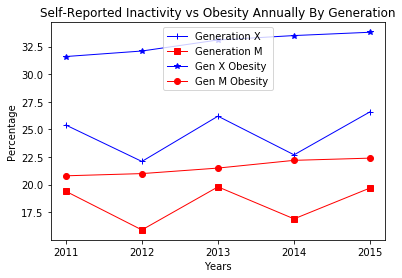

In [137]:
#ACTIVITY LINE GRAPHS -Dar
# Set x axis to numerical value for month
x_axis = "2011","2012","2013","2014","2015"



# Avearge GenX not exercising each year
activityGenX = [25.4, 22.1, 26.2, 22.7, 26.6]
# Avearge GenM not exercising each year
activityGenM = [19.4, 15.9, 19.8, 16.9, 19.7]
# Avearge GenX obese each year
obesityGenX = [31.6, 32.1, 33.1, 33.5, 33.8]
# Avearge GenM obese each year
obesityGenM = [20.8, 21, 21.5, 22.2, 22.4]

# Create a handle for each plot
genX, = plt.plot(x_axis, activityGenX, marker="+",color="blue", linewidth=1, label="Generation X")
genM, = plt.plot(x_axis, activityGenM, marker="s", color="Red", linewidth=1, label="Generation M")
genXo, = plt.plot(x_axis, obesityGenX, marker="*",color="blue", linewidth=1, label="Gen X Obesity")
genMo, = plt.plot(x_axis, obesityGenM, marker="o", color="Red", linewidth=1, label="Gen M Obesity")

# Set our legend to where the chart thinks is best
plt.legend(handles=[genX, genM, genXo, genMo], loc="best")

# Create labels for the X and Y axis
plt.xlabel("Years")
plt.ylabel("Percentage")
plt.title('Self-Reported Inactivity vs Obesity Annually By Generation')


# Save and display the chart
# Save and display the chart
plt.savefig("Resources/NoActivityLineChart.png")
plt.show()

In [126]:
#Heavy Activity Dataframe - Dar

HeavyActivityGenM_df = GenM_Data[(GenM_Data["Question"] == "Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)")]
HeavyActivityGenX_df = GenX_Data[(GenX_Data["Question"] == "Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)")]

#Achieve Means by Years to plot using groupby
HeavyActivityYearsGenM_df =  HeavyActivityGenM_df.groupby("Year")["Data_Value"].mean()
HeavyActivityYearsGenX_df =  HeavyActivityGenX_df.groupby("Year")["Data_Value"].mean()

HeavyActivityYearsGenX_df.head()

Year
2011    29.200000
2013    29.325000
2015    29.151852
2017    28.026852
Name: Data_Value, dtype: float64

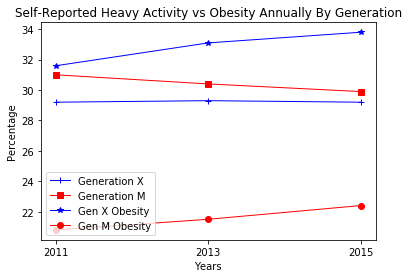

In [138]:
#ACTIVITY LINE GRAPHS- Heavy Activity -Dar
# Set x axis to numerical value for month
x_axis = "2011","2013","2015"



# Avearge GenX not exercising each year
activityGenX = [29.2, 29.3, 29.2]
# Avearge GenM not exercising each year
activityGenM = [31, 30.4, 29.9]
# Avearge GenX obese each year
obesityGenX = [31.6, 33.1, 33.8]
# Avearge GenM obese each year
obesityGenM = [20.8, 21.5, 22.4]

# Create a handle for each plot
genX, = plt.plot(x_axis, activityGenX, marker="+",color="blue", linewidth=1, label="Generation X")
genM, = plt.plot(x_axis, activityGenM, marker="s", color="Red", linewidth=1, label="Generation M")
genXo, = plt.plot(x_axis, obesityGenX, marker="*",color="blue", linewidth=1, label="Gen X Obesity")
genMo, = plt.plot(x_axis, obesityGenM, marker="o", color="Red", linewidth=1, label="Gen M Obesity")

# Set our legend to where the chart thinks is best
plt.legend(handles=[genX, genM, genXo, genMo], loc="best")

# Create labels for the X and Y axis
plt.xlabel("Years")
plt.ylabel("Percentage")
plt.title('Self-Reported Heavy Activity vs Obesity Annually By Generation')


# Save and display the chart
# Save and display the chart
plt.savefig("Resources/HeavyActivityLineChart.png")
plt.show()

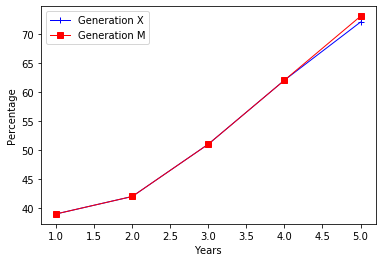

In [81]:
#NUTRITION LINE GRAPHS -Dar
# Set x axis to numerical value for month
x_axis = np.arange(1,6,1)
x_axis

# Avearge GenX not exercising each year
nutritionGenX = [39, 42, 51, 62, 72]
# Avearge GenM not exercising each year
nutritionGenM = [39, 42, 51, 62, 73]

# Create a handle for each plot
genX, = plt.plot(x_axis, nutritionGenX, marker="+",color="blue", linewidth=1, label="Generation X")
genM, = plt.plot(x_axis, nutritionGenM, marker="s", color="Red", linewidth=1, label="Generation M")

# Set our legend to where the chart thinks is best
plt.legend(handles=[genX, genM], loc="best")

# Create labels for the X and Y axis
plt.xlabel("Years")
plt.ylabel("Percentage")

# Save and display the chart

plt.show()

#NUTRITION LINE GRAPHS WILL NOT WORK AS THERE IS ONLY ONE YEAR (2017) REPRESENTED##

In [75]:
#Trying to make a Nutrition Dataframe with two questions- Dar
GenX_Nutrition_df = GenX_Data[(GenX_Data["Question"] == "Percent of adults who report consuming fruit less than one time daily") | ("Percent of adults who report consuming vegetables less than one time daily")]
GenX_Nutrition_df.head()
#GenM_Nutrition_df = GenX_Data[(GenX_Data["Question"] == "Percent of adults who report consuming fruit less than one time daily" or "Percent of adults who report consuming vegetables less than one time daily")]
#GenM_Nutrition_df.head()

TypeError: Cannot perform 'or_' with a dtyped [bool] array and scalar of type [bool]

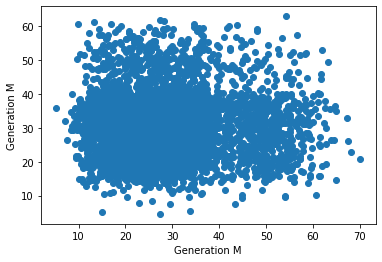

In [46]:
#Practicing correlation charts-Dar
data_valueM = GenM_Data.iloc[:,7]
data_valueM = GenM_Data.iloc[:,7]
#correlation = sts.pearsonr(data_valueM,data_valueX)
plt.scatter(data_valueM,data_valueX)
plt.xlabel('Generation M')
plt.ylabel('Generation M')
#print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

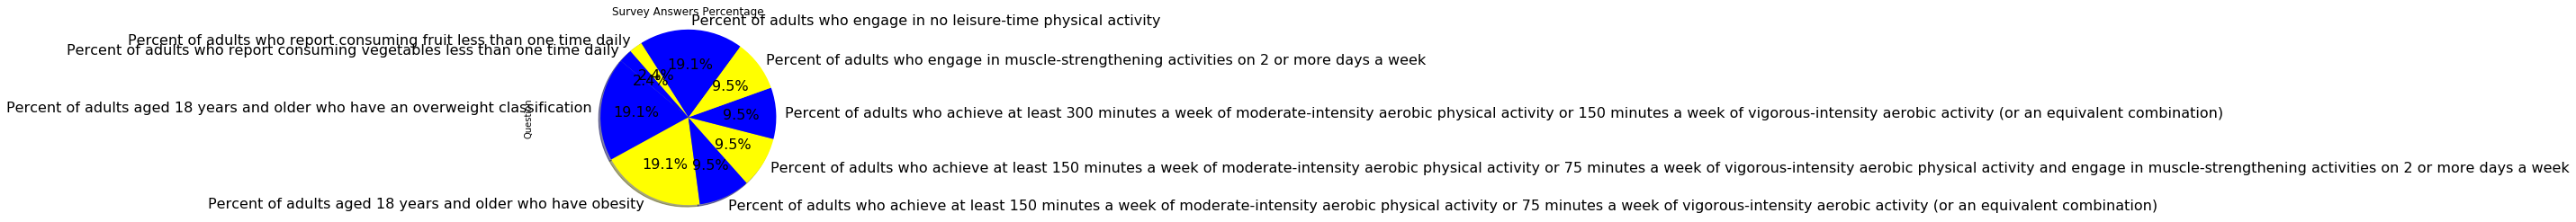

In [66]:
#Pie plot with each question-Dar
GenM_Weight_Data_count = pd.DataFrame(GenM_Weight_Data['Question'].count()) 

# View the groupby dataframe 
#GenM_Weight_Data_count

#GenM_Weight_Data = GenM_Data.groupby('Topic')
#GenM_Weight_Data.head()
# Create a pie chart based off of the group series from before 
GenM_Weight_Data_count.plot(kind='pie', y='Question', \
                        title="Survey Answers Percentage",startangle=140,\
                        autopct='%1.1f%%',shadow=True, fontsize=16, colors =["blue","yellow"],legend =False) 

# Make the axis equal to avoid plotting an egg shaped pie chart 
plt.axis("equal") 
#plt.savefig("figures/PandaPieChart.png") 
plt.show()

In [61]:
#Code for correlation chart that identified differnt lengths, therefore would not work
GenM_Weight_df = GenM_Data[(GenM_Data["Question"] == "Percent of adults aged 18 years and older who have obesity")]
GenM_Activity_df = GenM_Data[(GenM_Data["Question"] == "Percent of adults who engage in no leisure-time physical activity")]
ActivityM = GenM_Activity_df.iloc[:,7]
ObesityM = GenM_Weight_df.iloc[:,7]
correlation = sts.pearsonr(ActivityM,ObesityM)
plt.scatter(ActivityM,ObesityM)
plt.xlabel('No Physical Activity')
plt.ylabel('Rate of Obesity')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()


ValueError: x and y must have the same length.

In [54]:
GenM_Weight_mean = GenM_Data["Data_Value"].mean()
GenM_Weight_mean

28.96185797230905

In [55]:
GenX_Weight_df = GenX_Data[(GenX_Data["Question"] == "Percent of adults aged 18 years and older who have obesity")]
GenX_Weight_df.head()

,Year,StateAbbr,State,Class,Topic,Question,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,...,Education,Gender,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategory1
30,2015,NY,New York,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,29.7,29.7,26.7,32.8,...,NaN,NaN,NaN,NaN,"(42.827001032, -75.543970427)",OWS,OWS1,Q036,36,Age (years)
87,2013,WA,Washington,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.3,33.3,30.5,36.2,...,NaN,NaN,NaN,NaN,"(47.522278629, -120.47001079)",OWS,OWS1,Q036,53,Age (years)
261,2012,MS,Mississippi,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,37.4,37.4,34.1,40.8,...,NaN,NaN,NaN,NaN,"(32.745510099, -89.538030825)",OWS,OWS1,Q036,28,Age (years)
381,2015,IA,Iowa,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,37.9,37.9,33.4,42.5,...,NaN,NaN,NaN,NaN,"(42.469400913, -93.816490556)",OWS,OWS1,Q036,19,Age (years)
548,2011,MO,Missouri,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,37.7,37.7,33.8,41.7,...,NaN,NaN,NaN,NaN,"(38.635790776, -92.566300053)",OWS,OWS1,Q036,29,Age (years)


In [56]:
GenX_Weight_mean = GenX_Data["Data_Value"].mean()
GenX_Weight_mean

31.326507369361323

In [57]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM Questions
Question = GenX_Data.groupby('Question') 
Question.head()

Question_mean = Question["Data_Value"].mean()
Question_median = Question["Data_Value"].median()
Question_variance = Question["Data_Value"].var()
Question_std = Question["Data_Value"].std()
Question_sem = Question["Data_Value"].sem()

GenX_Q_Summary = pd.DataFrame({"Mean":Question_mean, "Median":Question_median, "Variance":Question_variance, "Standard Deviation":Question_std, "SEM":Question_sem})
GenX_Q_Summary

,Mean,Median,Variance,Standard Deviation,SEM
Question,,,,,
Percent of adults aged 18 years and older who have an overweight classification,36.400234,36.55,7.151719,2.674270,0.091405
Percent of adults aged 18 years and older who have obesity,33.831075,33.65,24.455478,4.945248,0.169025
Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),49.279953,49.50,37.619290,6.133457,0.297867
Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week,19.154717,19.30,13.055959,3.613303,0.175478
Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),28.919575,28.60,23.880869,4.886806,0.237324
Percent of adults who engage in muscle-strengthening activities on 2 or more days a week,27.937028,28.70,19.571699,4.423991,0.214848
Percent of adults who engage in no leisure-time physical activity,24.619555,23.95,35.290907,5.940615,0.203284
Percent of adults who report consuming fruit less than one time daily,38.017593,37.40,39.080903,6.251472,0.601548
Percent of adults who report consuming vegetables less than one time daily,17.662963,16.95,25.863475,5.085615,0.489363


In [67]:
#Attempt at configged bar chart with both generations
#GEXlabels = ['G1', 'G2', 'G3', 'G4', 'G5']
genX_means = [36.4, 33.8, 49.3, 19.2, 28.9, 27.9, 24.6, 38.0, 17.7]
genM_means = [29.6, 22.3, 52.1, 26.2, 30, 40.1, 18.4, 39.2, 21.7]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, genX_means, width, label='Generation X')
rects2 = ax.bar(x + width/2, genM_means, width, label='Genereation M')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('Scores by generation and question')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [58]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM Question
Question = GenM_Data.groupby('Question') 
Question.head()

Question_mean = Question["Data_Value"].mean()
Question_median = Question["Data_Value"].median()
Question_variance = Question["Data_Value"].var()
Question_std = Question["Data_Value"].std()
Question_sem = Question["Data_Value"].sem()

GenM_Q_Summary = pd.DataFrame({"Mean":Question_mean, "Median":Question_median, "Variance":Question_variance, "Standard Deviation":Question_std, "SEM":Question_sem})
GenM_Q_Summary

,Mean,Median,Variance,Standard Deviation,SEM
Question,,,,,
Percent of adults aged 18 years and older who have an overweight classification,29.584346,29.90,22.129018,4.704149,0.160785
Percent of adults aged 18 years and older who have obesity,22.333762,22.30,49.875525,7.062261,0.241383
Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),52.068632,51.70,34.400692,5.865210,0.284840
Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week,26.219811,25.85,27.378992,5.232494,0.254112
Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),29.982075,29.60,25.940955,5.093226,0.247349
Percent of adults who engage in muscle-strengthening activities on 2 or more days a week,40.142217,39.85,44.155826,6.644985,0.322709
Percent of adults who engage in no leisure-time physical activity,18.443326,17.80,23.063560,4.802454,0.164337
Percent of adults who report consuming fruit less than one time daily,39.155556,38.30,27.801931,5.272754,0.507371
Percent of adults who report consuming vegetables less than one time daily,21.693519,20.50,32.221359,5.676386,0.546211


In [59]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM Questions
# This method produces everything in a single groupby function.
age_stats = agedem_df.groupby('Age') 
age_stats.head()

age_stats_mean = age_stats["Data_Value"].mean()
age_stats_median = age_stats["Data_Value"].median()
age_stats_variance = age_stats["Data_Value"].var()
age_stats_std = age_stats["Data_Value"].std()
age_stats_sem = age_stats["Data_Value"].sem()

S_Summary = pd.DataFrame({"Mean":age_stats_mean, "Median":age_stats_median, "Variance":age_stats_variance, "Standard Deviation":age_stats_std, "SEM":age_stats_sem})
S_Summary

,Mean,Median,Variance,Standard Deviation,SEM
Age,,,,,
18 - 24,28.141358,25.8,166.600308,12.907374,0.272779
25 - 34,29.782358,29.3,89.339273,9.451945,0.199753
35 - 44,30.878115,30.6,86.405196,9.295440,0.196446
45 - 54,31.774900,32.0,92.603543,9.623073,0.203370


In [60]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM Questions
# This method produces everything in a single groupby function.

Question = agedem_df.groupby('Question') 
Question.head()

Question_mean = Question["Data_Value"].mean()
Question_median = Question["Data_Value"].median()
Question_variance = Question["Data_Value"].var()
Question_std = Question["Data_Value"].std()
Question_sem = Question["Data_Value"].sem()

Q_Summary = pd.DataFrame({"Mean":Question_mean, "Median":Question_median, "Variance":Question_variance, "Standard Deviation":Question_std, "SEM":Question_sem})
Q_Summary

,Mean,Median,Variance,Standard Deviation,SEM
Question,,,,,
Percent of adults aged 18 years and older who have an overweight classification,32.992290,34.20,26.252682,5.123737,0.123833
Percent of adults aged 18 years and older who have obesity,28.082418,29.40,70.210147,8.379150,0.202511
Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),50.674292,50.60,37.913955,6.157431,0.211447
Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week,22.687264,21.90,32.687228,5.717275,0.196332
Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),29.450825,29.05,25.164061,5.016379,0.172263
Percent of adults who engage in muscle-strengthening activities on 2 or more days a week,34.039623,32.55,69.111769,8.313349,0.285482
Percent of adults who engage in no leisure-time physical activity,21.531440,20.85,38.702180,6.221108,0.150530
Percent of adults who report consuming fruit less than one time daily,38.586574,38.00,33.611121,5.797510,0.394471
Percent of adults who report consuming vegetables less than one time daily,19.678241,18.55,32.987571,5.743481,0.390794


In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Create a dataframe grouping by the 'State' column 
state_groups = agedem_df.groupby('State') 

# Create a dataframe counting the number of data points for each age 
state_groups_count = pd.DataFrame(state_groups['State'].count()) 

# View the groupby dataframe 
state_groups_count.head()

,State
State,
Alabama,168
Alaska,168
Arizona,168
Arkansas,168
California,168


In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM Questions
# This method produces everything in a single groupby function.
state_stats = agedem_df.groupby('State') 
state_stats.head()

state_stats_mean = state_stats["Data_Value"].mean()
state_stats_median = state_stats["Data_Value"].median()
state_stats_variance = state_stats["Data_Value"].var()
state_stats_std = state_stats["Data_Value"].std()
state_stats_sem = state_stats["Data_Value"].sem()

St_Summary = pd.DataFrame({"Mean":state_stats_mean, "Median":state_stats_median, "Variance":state_stats_variance, "Standard Deviation":state_stats_std, "SEM":state_stats_sem})
St_Summary.head()

,Mean,Median,Variance,Standard Deviation,SEM
State,,,,,
Alabama,30.355952,29.60,81.916132,9.050753,0.698281
Alaska,31.995238,31.55,155.763570,12.480528,0.962894
Arizona,30.464286,29.45,99.166382,9.958232,0.768294
Arkansas,30.934524,30.70,98.596645,9.929584,0.766084
California,30.279762,28.10,137.434558,11.723249,0.904468


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatterData = merged_df[(merged_df["Drug Regimen"] == "Capomulin")]
scatterData = scatterData[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
groupByData = scatterData.groupby(["Mouse ID","Weight (g)"])
scatterDataDF = groupByData["Tumor Volume (mm3)"].mean()#.to_frame()
scatterDataDF = scatterDataDF.reset_index()
scatterDataDF.head()

In [ ]:
plt.figure()
scatterDataDF.plot(x="Weight (g)", y="Tumor Volume (mm3)", kind = "scatter", marker="o")

plt.title("Mouse Weight Vs Average Tumor Volume")
# plt.xlim(10, 25)
# plt.ylim(30, 50)
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()